In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
file_name = 'pre_processado_completo_mapa.csv'

df = pd.read_csv(file_name, header=0, error_bad_lines=False, warn_bad_lines=False, low_memory=False)

In [3]:
df.head()

,datetime,city,state,country,shape,duration_s,comments,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611


In [4]:
lat_lon = np.array(df[['longitude', 'latitude']]).astype(float)

In [5]:
print(len(lat_lon))
print(lat_lon)

88678
[[-97.9411111  29.8830556]
 [-98.581082   29.38421  ]
 [ -2.916667   53.2      ]
 ...
 [-97.4777778  35.6527778]
 [-82.6958333  34.3769444]
 [-80.1436111  26.1219444]]


In [6]:
states = list(df['state'])

In [7]:
pesos = [states.count(s) for s in states]

In [8]:
scaler = MinMaxScaler()

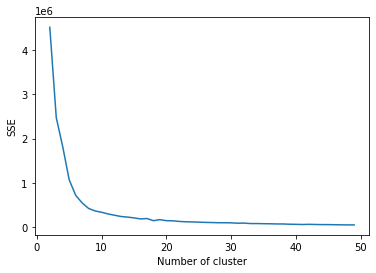

In [9]:
sse = {}
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(scaler.fit_transform(lat_lon), sample_weight=pesos)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### De acordo com o Elbow Criteria o número adequado de clusters é em torno de 25

In [10]:
kmeans = KMeans(n_clusters=25, max_iter=2000)
kmeans.fit(scaler.fit_transform(lat_lon), sample_weight=pesos)
lat_lon_scaled = np.array(scaler.fit_transform(lat_lon))
lat_lon_scaled

array([[0.22167546, 0.72476095],
       [0.21987323, 0.72155423],
       [0.4892746 , 0.87464866],
       ...,
       [0.22298025, 0.7618503 ],
       [0.26460781, 0.7536489 ],
       [0.27179515, 0.70058349]])

In [11]:
centers = kmeans.cluster_centers_

In [12]:
locations = kmeans.labels_.astype(float)
print(len(locations))
locations

88678


array([10., 10.,  4., ..., 18.,  2., 13.])

Text(0, 0.5, 'Longitude')

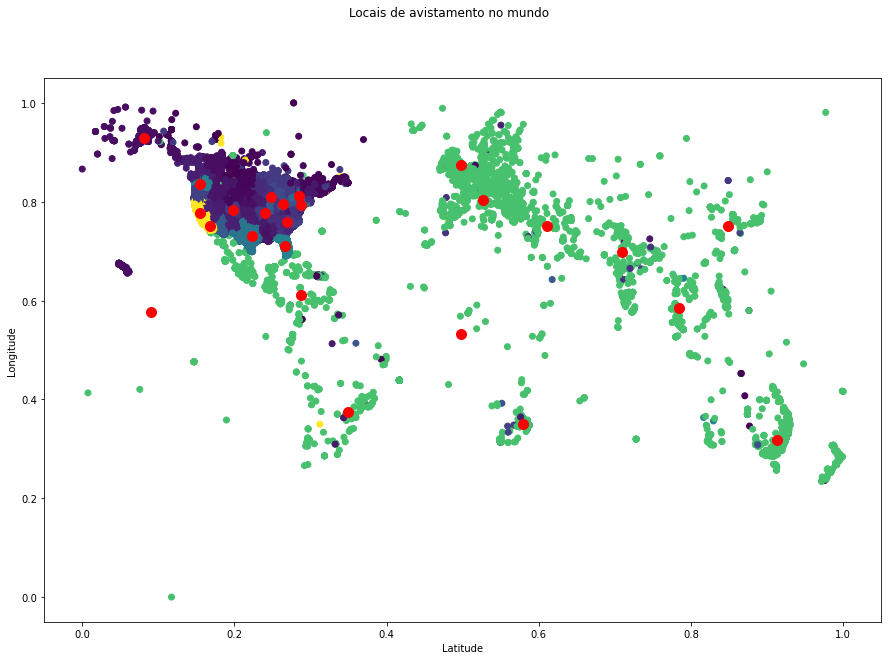

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(lat_lon_scaled[:, 0], lat_lon_scaled[:, 1], c=pesos)
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
fig.suptitle('Locais de avistamento no mundo')
plt.xlabel('Latitude')
plt.ylabel('Longitude')